In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('Raw Data/train_V2.csv')


<b>Players that didn't walk probably were disconected. These data shoud not be analysed</b>

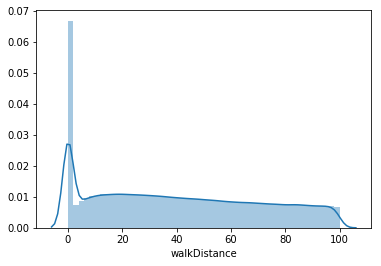

In [6]:
sns.distplot(df[(df.walkDistance<100)]['walkDistance'])

In [7]:
df = df[df.walkDistance>0]

In [9]:
df.to_csv('Cleaned Data/data_cleaned.csv')